In [ ]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore') 

# heart = pd.read_csv('../input/heart-failure-prediction/heart.csv')
heart = pd.read_csv('/content/heart.csv')
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
# installing fonts
!pip install proplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### **DATA PREPROCESSING**

In [ ]:
print('Count of Features per Data Type:')
heart.dtypes.value_counts()
# Do we have duplicates?
print('Number of Duplicates:', len(heart[heart.duplicated()]))

# Do we have missing values?
print('Number of Missing Values:', heart.isnull().sum().sum())
heart.describe()

Count of Features per Data Type:
Number of Duplicates: 0
Number of Missing Values: 0


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
heart['FastingBS'] = heart['FastingBS'].astype(str)
heart['HeartDisease'] = heart['HeartDisease'].astype(str)

### **EDA**

In [ ]:
# Defining plot design
def plot_design():
    plt.xlabel('')
    plt.ylabel('')
    plt.yticks(fontsize=15, color='black')
    plt.xticks(fontsize=15, color='black')
    plt.box(False)
    plt.title(i[1], fontsize=24, color='black')
    plt.tight_layout(pad=5.0)

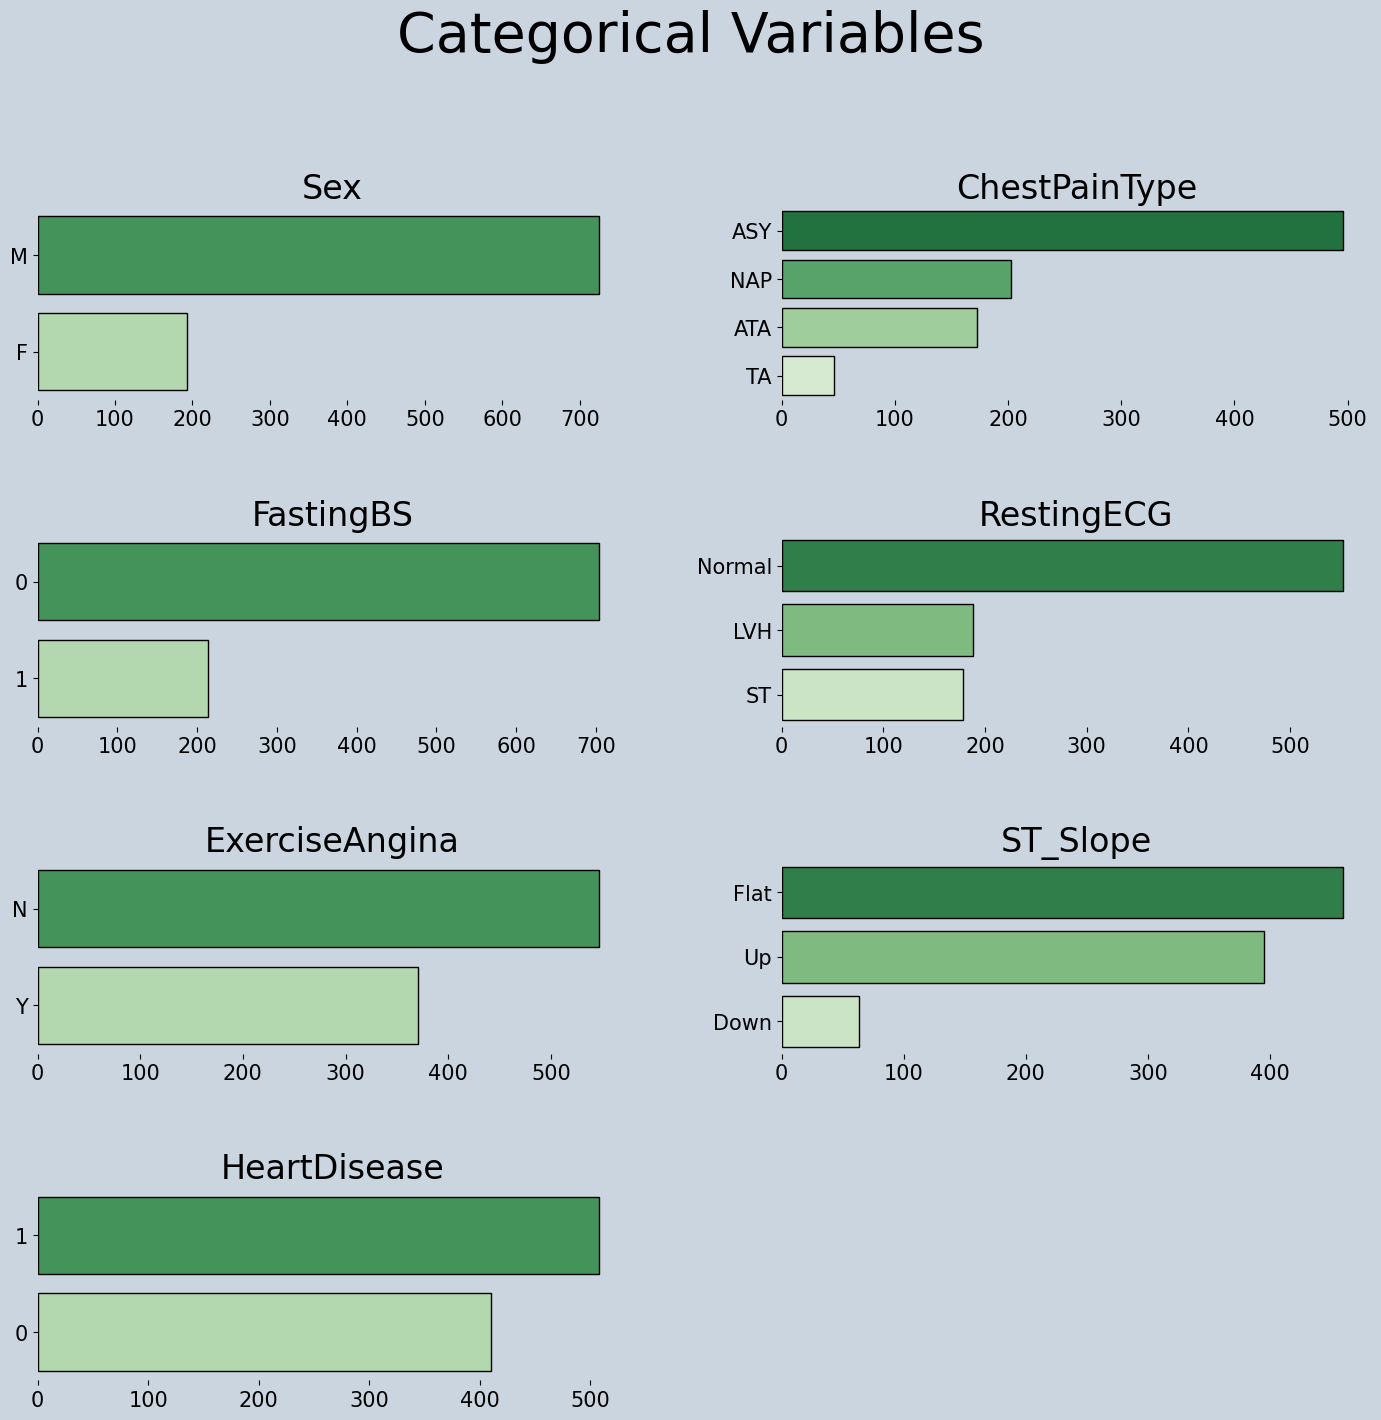

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
# import proplot as pplt

# Select categorical variables
categ = heart.select_dtypes(include=object).columns

# Visualize
fig, ax = plt.subplots(figsize =(15, 15))
fig.patch.set_facecolor('#CAD5E0')
# mpl.rcParams['font.family'] = 'TeX Gyre Heros'

# Loop columns
for i in (enumerate(categ)):
    plt.subplot(4, 2, i[0]+1)
    sns.countplot(y = i[1], data = heart, order=heart[i[1]].value_counts().index, palette='Greens_r', edgecolor='black')
    plot_design()
    plt.suptitle('Categorical Variables', fontsize=40)

Note that HeartDisease, the target variable of this dataset, is decently balanced.

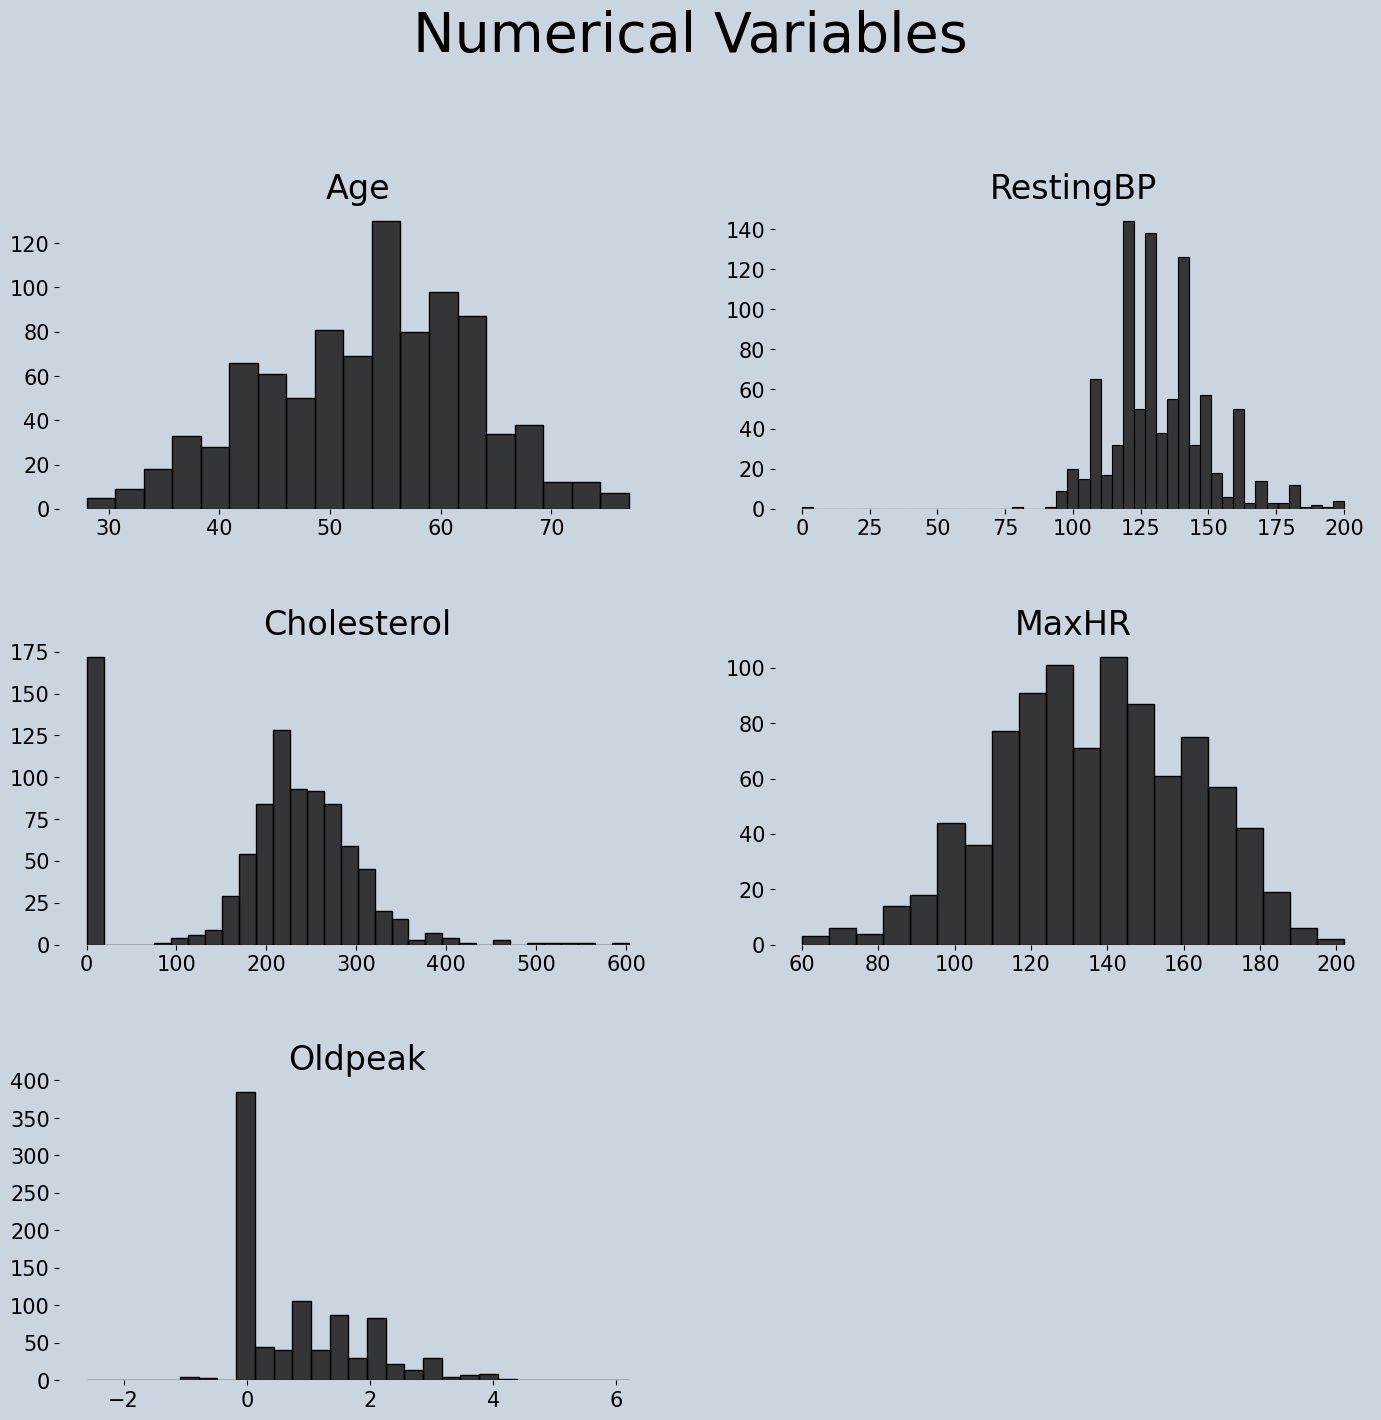

In [ ]:
# Select numerical variables
numeric = heart.select_dtypes(exclude=object).columns

# Visualize
fig, ax = plt.subplots(figsize =(15, 15))
fig.patch.set_facecolor('#CAD5E0')
# mpl.rcParams['font.family'] = 'TeX Gyre Heros'

# Loop columns
for i in (enumerate(numeric)):
    plt.subplot(3, 2, i[0]+1)
    sns.histplot(x = i[1], data = heart, color='black', edgecolor='black')
    plot_design()
    plt.suptitle('Numerical Variables', fontsize=40)

### **Feature Engineering**

In [ ]:
# Scaling features
from sklearn.preprocessing import MinMaxScaler

for col in numeric:
    heart[col] = MinMaxScaler().fit_transform(heart[[col]])

# **Outliers**

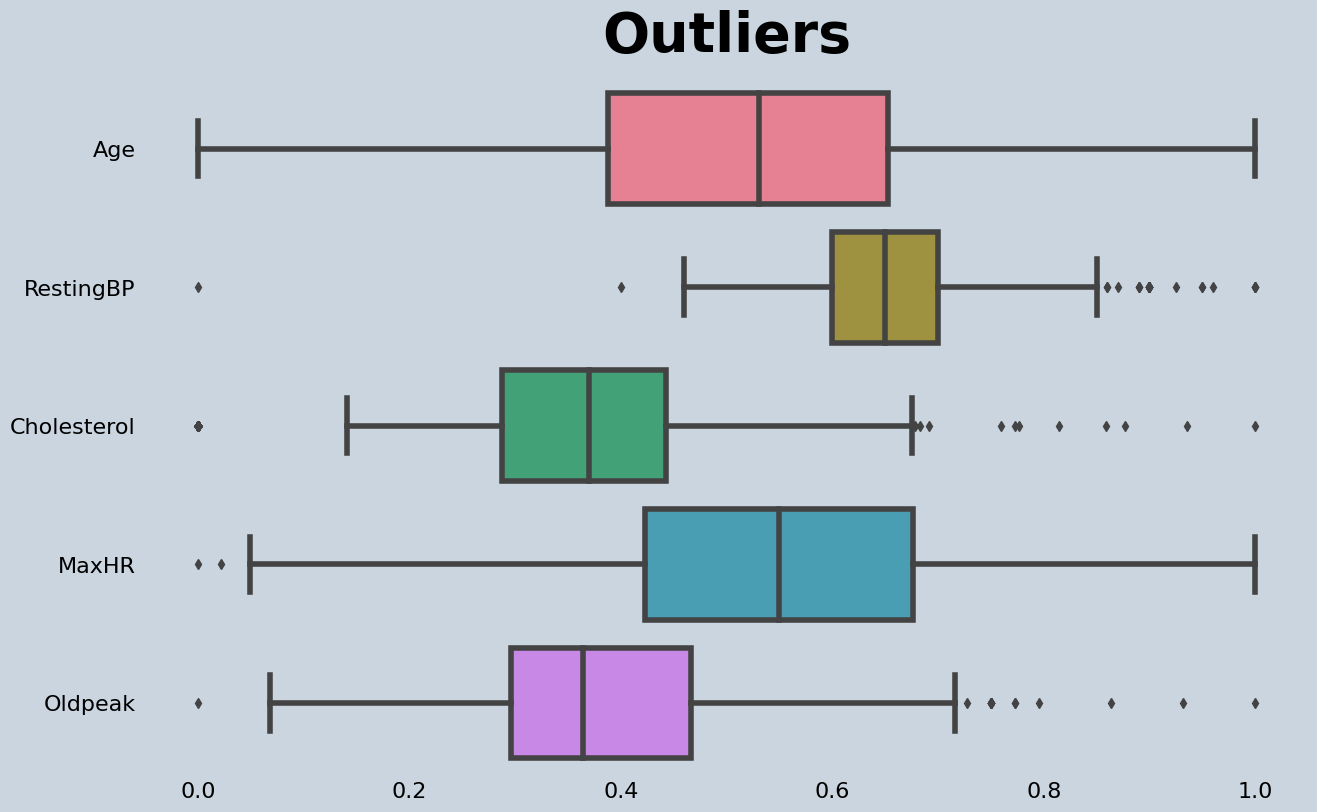

In [ ]:
fig, ax = plt.subplots(figsize =(15,9))
ax.patch.set_facecolor('#CAD5E0')
fig.patch.set_facecolor('#CAD5E0')
mpl.rcParams['font.family'] = 'TeX Gyre Heros'

sns.boxplot(data = heart, ax=ax, palette='husl', orient="h", linewidth=4);

# Colors
for i,artist in enumerate(ax.artists):
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    artist.set_facecolor('None')
    for j in range(i*6,i*6+6):
        line = ax.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)

# Remove ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Remove axes splines
for i in ['top', 'bottom', 'left', 'right']:
    ax.spines[i].set_visible(False)

# Remove grid
ax.grid(False)

# Change color axis
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);

# Title
ax.set_title('Outliers', fontsize=40, fontweight="bold", pad=20);